In [2]:
import pandas as pd
#import pandas.DataFrame as df
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [40]:
#df = pd.read_csv('/home/drew/onc/AGUFM2020_poster/code_working/BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200106T193330Z_20200111T235959Z.csv')
#df = pd.read_csv('/home/drew/onc/AGUFM2020_poster/code_working/BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200106T193330Z_20200111T235959Z.csv',skipinitialspace=True)
#df

fn = 'BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200109T000000Z_20200109T235959Z.csv'
fn = 'BaynesSoundMooring_20mbss_ConductivityTemperatureDepth_20200110T000000Z_20200110T235959Z.csv'
fn = 'BaynesSoundMooring_5mbss_ConductivityTemperatureDepth_20200119T000000Z_20200119T235959Z.csv'
dfall = pd.read_csv('dat\\'+fn,skipinitialspace=True)
df = dfall
df

,"#""Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)""",Conductivity (S/m),Conductivity QC Flag,Density (kg/m3),Density QC Flag,Practical Salinity (psu),Practical Salinity QC Flag,Pressure (decibar),Pressure QC Flag,Sigma-t (kg/m3),Sigma-t QC Flag,Sigma-theta (0 dbar) (kg/m3),Sigma-theta (0 dbar) QC Flag,Sound Speed (m/s),Sound Speed QC Flag,Temperature (C),Temperature QC Flag
0,2020-01-19T00:00:00.651Z,2.79234,1,1020.797925,1,26.6340,1,4.519,1,20.776972,1,20.777019,1,1470.222,1,7.4917,1
1,2020-01-19T00:00:01.678Z,2.79229,1,1020.797636,1,26.6337,1,4.502,1,20.776762,1,20.776809,1,1470.221,1,7.4915,1
2,2020-01-19T00:00:02.692Z,2.79241,1,1020.798268,1,26.6350,1,4.413,1,20.777807,1,20.777852,1,1470.220,1,7.4913,1
3,2020-01-19T00:00:03.706Z,2.79257,1,1020.800087,1,26.6366,1,4.540,1,20.779037,1,20.779084,1,1470.225,1,7.4915,1
4,2020-01-19T00:00:04.720Z,2.79265,1,1020.800668,1,26.6376,1,4.488,1,20.779859,1,20.779905,1,1470.224,1,7.4912,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85804,2020-01-19T23:59:55.895Z,3.03674,1,1022.570796,1,28.9476,1,4.511,1,22.549990,1,22.550044,1,1474.339,1,7.8136,1
85805,2020-01-19T23:59:56.901Z,3.03690,1,1022.572271,1,28.9496,1,4.479,1,22.551612,1,22.551665,1,1474.340,1,7.8132,1
85806,2020-01-19T23:59:57.908Z,3.03654,1,1022.569346,1,28.9458,1,4.491,1,22.548632,1,22.548685,1,1474.335,1,7.8132,1
85807,2020-01-19T23:59:58.914Z,3.03658,1,1022.569980,1,28.9468,1,4.441,1,22.549496,1,22.549549,1,1474.333,1,7.8126,1


In [41]:
df.columns[1]

'Conductivity (S/m)'

In [42]:
df.columns[15]

'Temperature (C)'

In [43]:
df.columns[0]

'#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"'

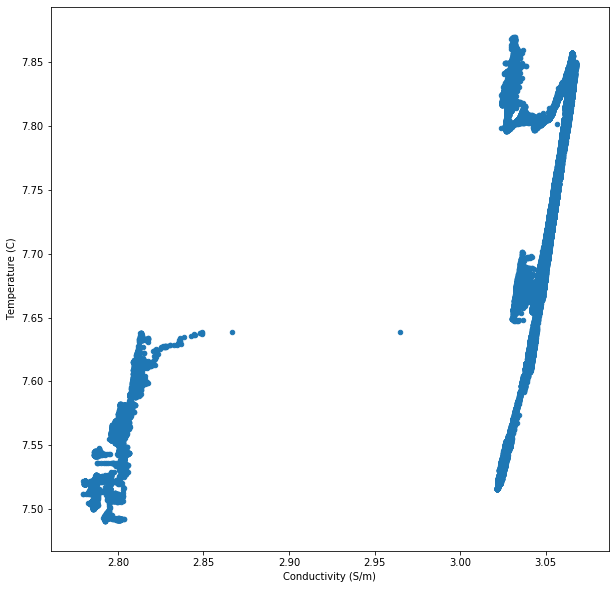

In [44]:
fig = df.plot.scatter(x='Conductivity (S/m)',y='Temperature (C)',figsize=(10,10))

In [45]:
#!pip install kmeans-pytorch

In [46]:
import torch
import numpy as np
from kmeans_pytorch import kmeans

In [47]:
# data
#data_size, dims, num_clusters = 1000, 2, 3
#xnp = np.random.randn(data_size, dims) / 6
#x = torch.from_numpy(xnp)

num_clusters = 2
tt = torch.as_tensor(df[['Conductivity (S/m)','Temperature (C)']].to_numpy())
#x = torch.from_numpy(df.values)
#torch_tensor = torch.tensor(targets_df['targets'].values) # coerce to array applying .values
#type(df['Conductivity (S/m)'].values) # coerce to array applying .values
#torch_tensor = torch.tensor(df['Conductivity (S/m)'].values.astype(np.float64))
#type(df[['Conductivity (S/m)','Temperature (C)']]) # pandas.core.frame.DataFrame
#df[['Conductivity (S/m)','Temperature (C)']].to_numpy()
#type(xnp)
tt


tensor([[2.7923, 7.4917],
        [2.7923, 7.4915],
        [2.7924, 7.4913],
        ...,
        [3.0365, 7.8132],
        [3.0366, 7.8126],
        [3.0365, 7.8127]], dtype=torch.float64)

In [48]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=tt, num_clusters=num_clusters, distance='euclidean'
)

running k-means on cpu..


[running kmeans]: 5it [00:00, 34.24it/s, center_shift=0.000078, iteration=5, tol=0.000100]


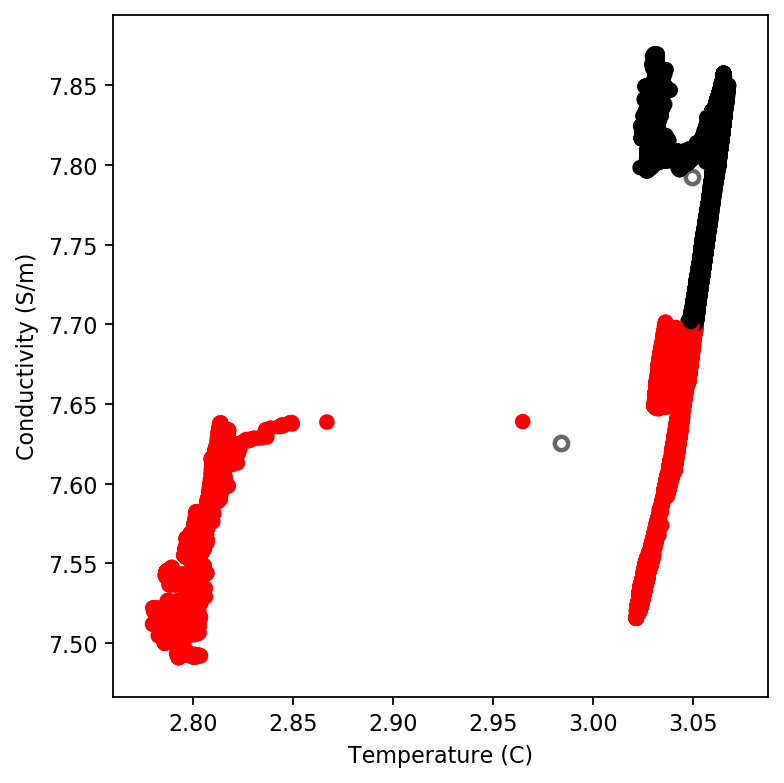

In [51]:
# plot
plt.figure(figsize=(5,5), dpi=160)
plt.scatter(tt[:, 0], tt[:, 1], c=cluster_ids_x, cmap='flag')
#plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
#plt.axis([-1, 1, -1, 1])
plt.ylabel("Conductivity (S/m)")
plt.xlabel("Temperature (C)")
plt.tight_layout()
plt.savefig('figs\\kmeans_'+fn+'.jpg')
plt.show()
           

tensor([[ 0.2414, -0.1995],
        [-0.1326,  0.0771],
        [-0.0206,  0.1173],
        ...,
        [-0.1429,  0.0554],
        [-0.0482,  0.1064],
        [ 0.0557,  0.1125]], dtype=torch.float64)

AttributeError: 'list' object has no attribute 'savefig'

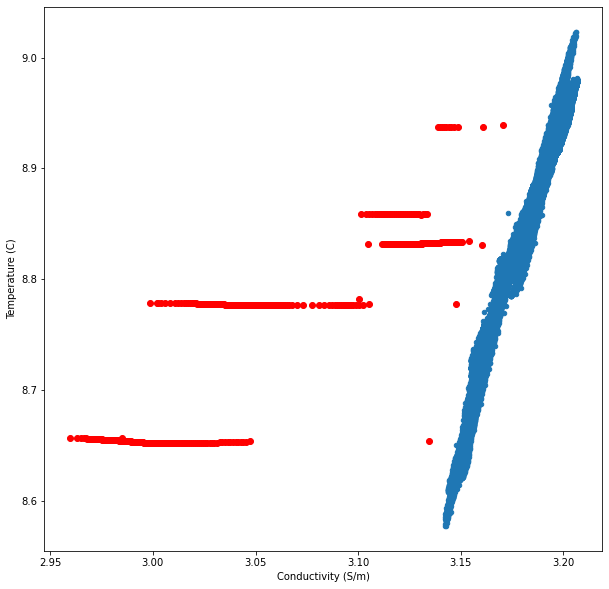

In [73]:
# cheating
# define line to divide
x1=3.13
y1=8.6
x2=3.19
y2=9

# plot it
fig = df.plot.scatter(x='Conductivity (S/m)',y='Temperature (C)',figsize=(10,10))
logflag = (df['Conductivity (S/m)']-x1)*(y2-y1) - (df['Temperature (C)']-y1)*(x2-x1) < 0
sav = fig.plot(df['Conductivity (S/m)'][logflag],df['Temperature (C)'][logflag],"or")
#savv = sav.get_figure()
sav.savefig('/home/drew/onc/AGUFM2020_poster/code_working/TCcurve2.jpg')

In [55]:
logflag

0         True
1         True
2         True
3         True
4         True
          ... 
439545    True
439546    True
439547    True
439548    True
439549    True
Length: 439550, dtype: bool

In [44]:
type(df['Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)'])
dt.strptime(df['Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)'],'%Y-%m-%dT%H:%M:%S.%fZ')

TypeError: strptime() argument 1 must be str, not Series

In [31]:
datefmt = dt.strptime(df.columns('Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)'),'%Y-%m-%dT%H:%M:%S.%fZ')
fig2=df.plot(x=datefmt,y='Conductivity (S/m)')
#.get_figure()
#fig.savefig('/home/drew/onc/AGUFM2020_poster/code_working/TCcurve1.jpg')

TypeError: 'Index' object is not callable

In [28]:
df.dt.strptime

AttributeError: 'DataFrame' object has no attribute 'dt'

In [25]:
dt.strptime('2020-01-11T23:59:55.414Z','%Y-%m-%dT%H:%M:%S.%fZ')

datetime.datetime(2020, 1, 11, 23, 59, 55, 414000)

In [27]:
datefmt

NameError: name 'datefmt' is not defined